In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [125]:
df = pd.read_csv(r'C:\Users\hmishra8\Downloads\Datasets_ML\games_dataset.csv')
df

,Game Name,Genre,Platform,Release Year,User Rating
0,Sekiro: Shadows Die Twice,Sports,Nintendo Switch,2014,9.654719
1,Control,Puzzle,Nintendo Switch,2000,3.457386
2,Among Us,Strategy,Nintendo Switch,2007,5.367622
3,Call of Duty: Modern Warfare,Stealth,PlayStation,2005,1.240325
4,League of Legends,Simulation,PC,2021,3.535476
...,...,...,...,...,...
4995,The Legend of Zelda: Breath of the Wild,Sports,PC,2013,6.352838
4996,Assassin's Creed Valhalla,Stealth,Mobile,2020,1.852730
4997,Fall Guys: Ultimate Knockout,Sports,Mobile,2021,5.268067
4998,Borderlands 3,Platformer,Xbox,2018,4.558510


In [126]:
df.head()

,Game Name,Genre,Platform,Release Year,User Rating
0,Sekiro: Shadows Die Twice,Sports,Nintendo Switch,2014,9.654719
1,Control,Puzzle,Nintendo Switch,2000,3.457386
2,Among Us,Strategy,Nintendo Switch,2007,5.367622
3,Call of Duty: Modern Warfare,Stealth,PlayStation,2005,1.240325
4,League of Legends,Simulation,PC,2021,3.535476


In [127]:
df.tail()

,Game Name,Genre,Platform,Release Year,User Rating
4995,The Legend of Zelda: Breath of the Wild,Sports,PC,2013,6.352838
4996,Assassin's Creed Valhalla,Stealth,Mobile,2020,1.852730
4997,Fall Guys: Ultimate Knockout,Sports,Mobile,2021,5.268067
4998,Borderlands 3,Platformer,Xbox,2018,4.558510
4999,Counter-Strike: Global Offensive,Action,PlayStation,2022,3.443231


In [128]:
df.shape

(5000, 5)

In [129]:
df.size

25000

In [130]:
df.columns

Index(['Game Name', 'Genre', 'Platform', 'Release Year', 'User Rating'], dtype='object')

In [131]:
df.duplicated().value_counts()

False    5000
Name: count, dtype: int64

In [132]:
df.dtypes

Game Name        object
Genre            object
Platform         object
Release Year      int64
User Rating     float64
dtype: object

In [133]:
df.nunique()

Game Name         58
Genre             14
Platform           5
Release Year      24
User Rating     5000
dtype: int64

In [134]:
df.describe()

,Release Year,User Rating
count,5000.000000,5000.000000
mean,2011.375400,5.524913
std,6.943984,2.598429
min,2000.000000,1.005878
25%,2005.000000,3.260596
50%,2011.000000,5.574233
75%,2017.000000,7.802727
max,2023.000000,9.996196


In [135]:
df.isnull().sum()

Game Name       0
Genre           0
Platform        0
Release Year    0
User Rating     0
dtype: int64

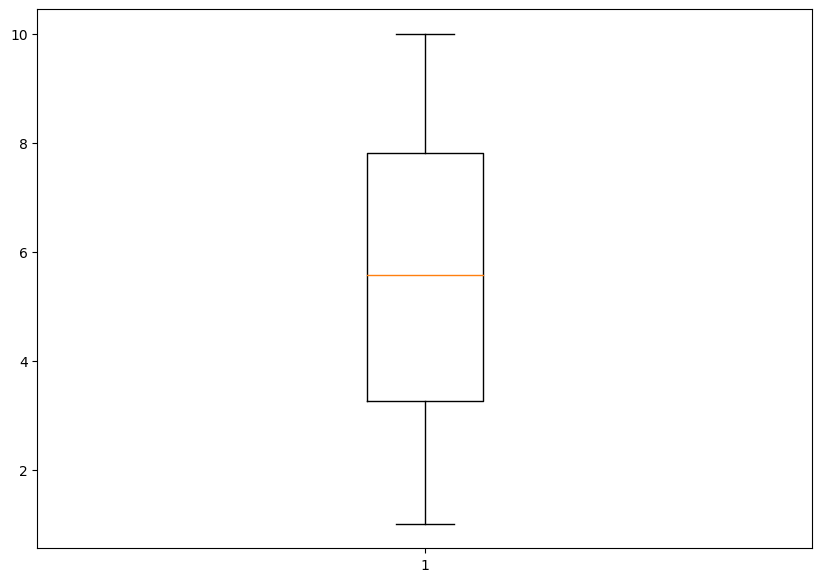

In [136]:
#Checking for Outliers 
data = df['User Rating']
fig = plt.figure(figsize=(10,7))
plt.boxplot(data)
plt.show()

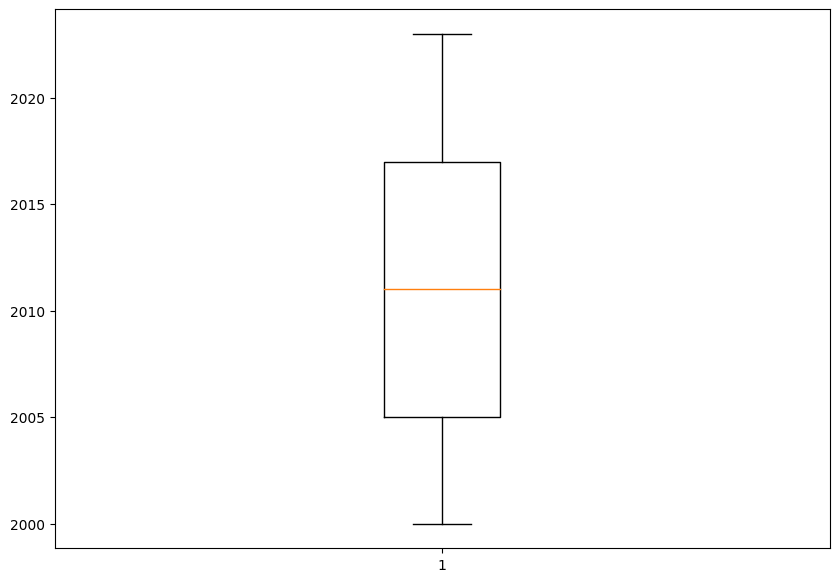

In [137]:
#Checking for Outliers (If any year is falling outside beyond a specified value)
data = df['Release Year']
fig = plt.figure(figsize=(10,7))
plt.boxplot(data)
plt.show()

{'Survival': 5.831934080640841, 'Horror': 5.629844566186963, 'Simulation': 5.626342732557983, 'Action': 5.603556009188073, 'Sports': 5.561171036545194, 'Fighting': 5.513217654483259, 'Puzzle': 5.5116841891718344, 'Adventure': 5.510799498102231, 'Shooter': 5.509609919454088, 'Strategy': 5.483329558738499, 'Racing': 5.46372298742119, 'Stealth': 5.423838749375974, 'Role-playing': 5.412652909604761, 'Platformer': 5.25465960004767}


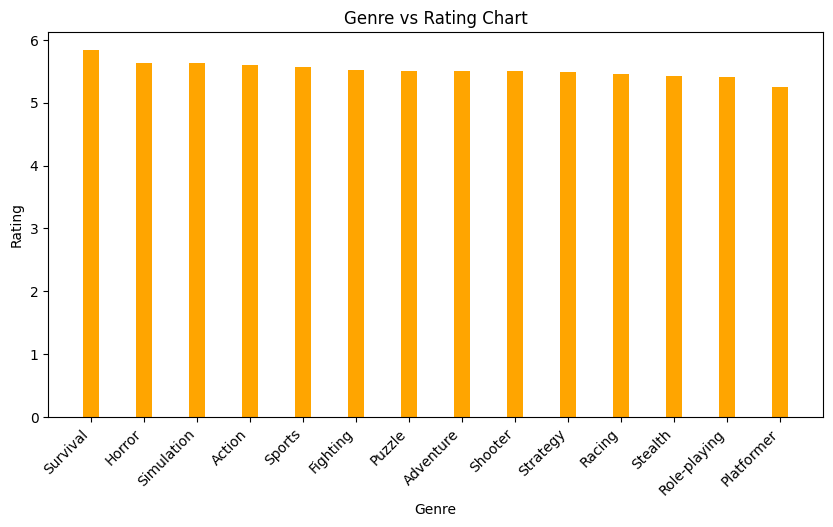

In [139]:
#Visualizing Genres with their mean user ratings-
user_rating_by_genre = df.groupby('Genre')['User Rating'].mean().sort_values(ascending=False).to_dict()
print(user_rating_by_genre)
Genre = list(user_rating_by_genre.keys())
Rating = list(user_rating_by_genre.values())
fig = plt.figure(figsize=(10,5))
plt.bar(Genre, Rating, color='Orange', width=0.3)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.title("Genre vs Rating Chart")
plt.show()

In [33]:
game_name = df.groupby('Game Name')['User Rating'].mean().sort_values(ascending=False).to_dict()
print(game_name)
Game = list(game_name.keys())
Rating = list(game_name.values())

{'Mass Effect Legendary Edition': 6.199697048526273, 'Valorant': 6.19887567987008, 'Sekiro: Shadows Die Twice': 5.9714864019497815, 'Ghost of Tsushima': 5.963760688180654, 'Hades': 5.914265125549258, 'Red Dead Redemption 2': 5.88161697320543, 'Halo Master Chief Collection': 5.87731210748761, 'Dark Souls III': 5.868892880147334, 'Rocket League': 5.86418362662203, 'Tetris': 5.83067759216168, 'Minecraft Dungeons': 5.7949974020780575, 'PUBG Mobile': 5.787384665775862, 'Monster Hunter: World': 5.782766989942875, 'World of Warcraft': 5.769951095476517, 'Call of Duty: Modern Warfare': 5.730681249356803, 'Grand Theft Auto V': 5.723011683603323, "Assassin's Creed Valhalla": 5.722674919336193, 'League of Legends: Wild Rift': 5.699563899522837, 'Borderlands 3': 5.688124890844932, 'Dying Light': 5.658494906121695, 'Halo Infinite': 5.65682630377342, 'Death Stranding': 5.6452988211021795, 'Super Mario Odyssey': 5.627845193085569, 'Forza Horizon 4': 5.616379212888896, 'Cyberpunk 2077': 5.601797205892

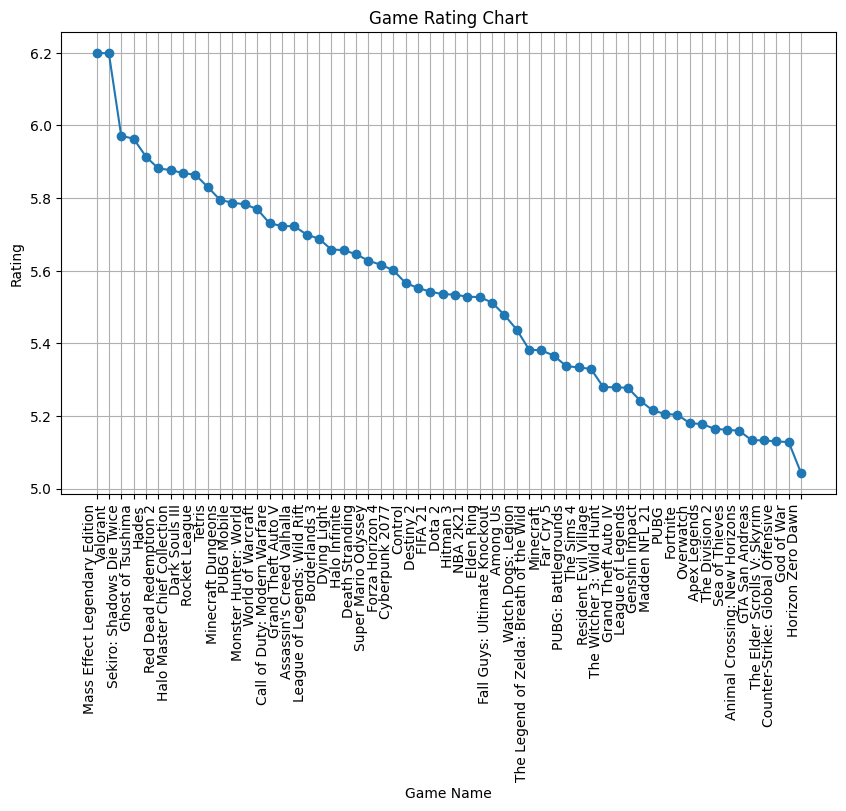

In [54]:
plt.plot(Game, Rating, marker='o')  # plot the data with circle markers
plt.xticks(rotation=90, ha='right')
plt.grid(False) 
plt.gcf().set_size_inches(10, 6)

# Step 3: Customize the plot (optional)
plt.title('Game Rating Chart')
plt.xlabel('Game Name')
plt.ylabel('Rating')
plt.grid(True)  # show grid lines

# Step 4: Display the plot
plt.show()

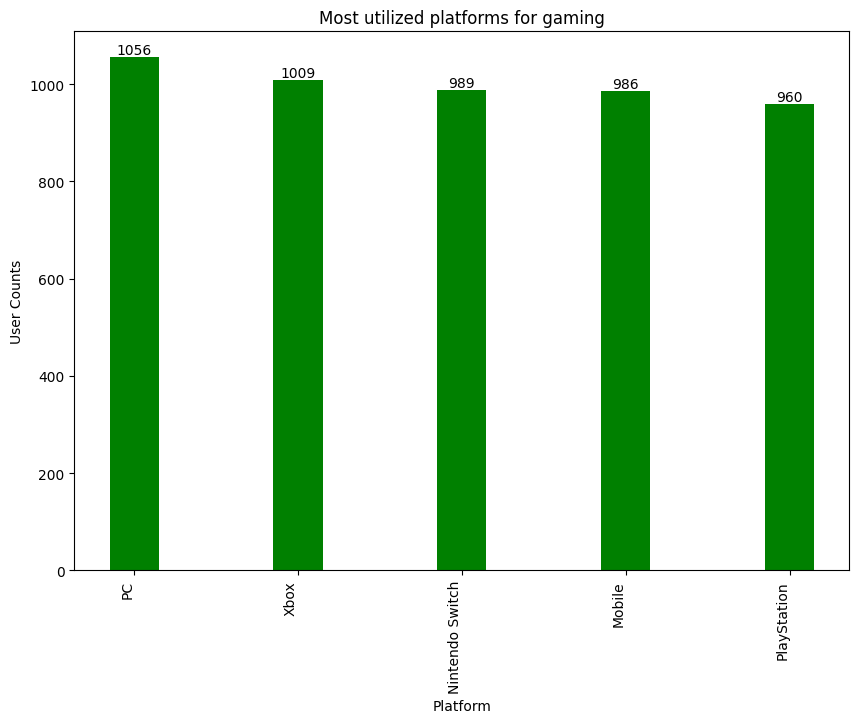

In [48]:
platform = df['Platform'].value_counts().to_dict()
platform
game_paltform = list(platform.keys())
user_count = list(platform.values())
fig = plt.figure(figsize=(10,7))
bars = plt.bar(game_paltform, user_count, color='Green', width=0.3)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.xticks(rotation=90, ha='right')
plt.xlabel("Platform")
plt.ylabel("User Counts")
plt.title("Most utilized platforms for gaming")
plt.show()

In [58]:
#Identifying the top-3 Genres that are being played on each unique platform

# Group by 'Platform' and 'Genre', then count occurrences
genre_counts = df.groupby(['Platform', 'Genre']).size().reset_index(name='counts')

# Function to get the top 3 genres for each platform
def get_top_n_genres(group, n=3):
    return group.nlargest(n, 'counts')

# Apply the function to each platform group
top_genres_per_platform = genre_counts.groupby('Platform').apply(get_top_n_genres).reset_index(drop=True)

print(top_genres_per_platform)

           Platform         Genre  counts
0            Mobile        Sports      92
1            Mobile      Fighting      77
2            Mobile        Puzzle      76
3   Nintendo Switch    Simulation      78
4   Nintendo Switch        Sports      78
5   Nintendo Switch        Action      77
6                PC        Sports      90
7                PC        Puzzle      83
8                PC       Shooter      83
9       PlayStation      Survival      82
10      PlayStation        Puzzle      80
11      PlayStation        Racing      76
12             Xbox  Role-playing      88
13             Xbox    Simulation      85
14             Xbox        Horror      82


C:\Users\hmishra8\AppData\Local\Temp\ipykernel_23980\360424994.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genres_per_platform = genre_counts.groupby('Platform').apply(get_top_n_genres).reset_index(drop=True)


In [69]:
# Visualizing Platform against the most popular Genres they are used for:
genre_counts = df.groupby(['Platform', 'Genre']).size().reset_index(name='counts')

# Function to get the top genre for each platform
def get_top_genre(group):
    return group.loc[group['counts'].idxmax()]

# Apply the function to each platform group
top_genre_per_platform = genre_counts.groupby('Platform', group_keys=False).apply(get_top_genre).reset_index(drop=True)

print(top_genre_per_platform)

          Platform         Genre  counts
0           Mobile        Sports      92
1  Nintendo Switch    Simulation      78
2               PC        Sports      90
3      PlayStation      Survival      82
4             Xbox  Role-playing      88


C:\Users\hmishra8\AppData\Local\Temp\ipykernel_23980\2940622760.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genre_per_platform = genre_counts.groupby('Platform', group_keys=False).apply(get_top_genre).reset_index(drop=True)


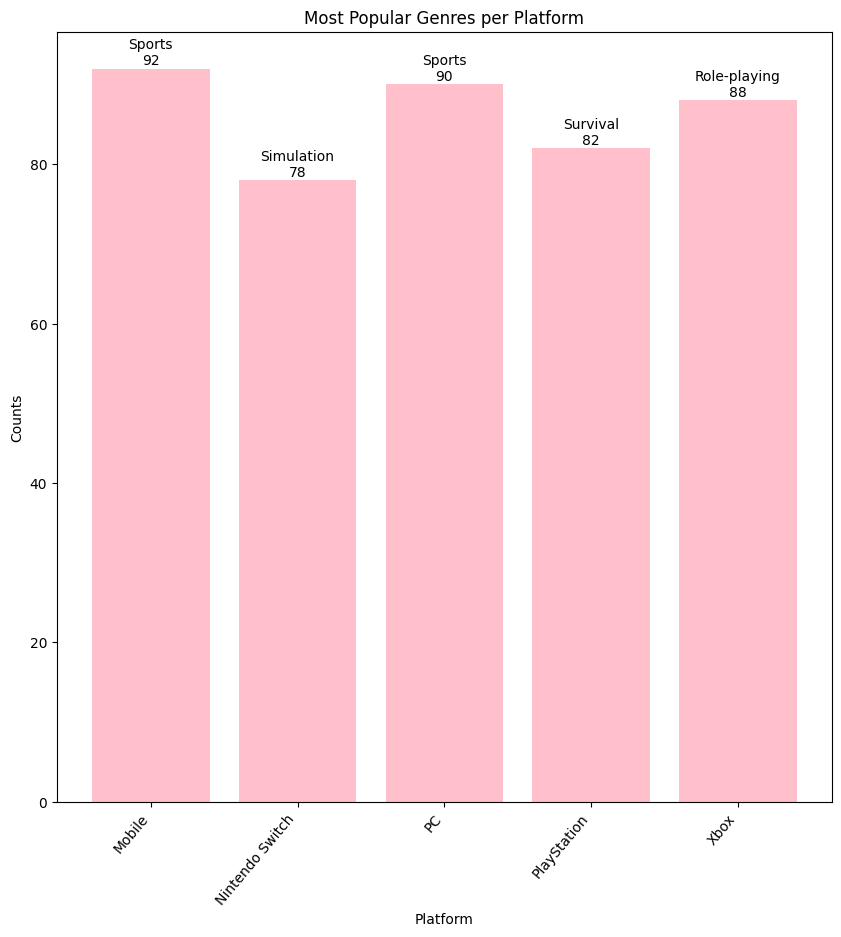

In [74]:
# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 10))
bars = ax.bar(top_genre_per_platform['Platform'], top_genre_per_platform['counts'], color='Pink')

# Add data labels
for bar, genre in zip(bars, top_genre_per_platform['Genre']):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{genre}\n{int(yval)}', ha='center', va='bottom')

# Customize the plot
plt.xticks(rotation=50, ha='right')
plt.xlabel("Platform")
plt.ylabel("Counts")
plt.title("Most Popular Genres per Platform")

# Display the plot
plt.show()